In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
closed_deals = pd.read_csv('/kaggle/input/Data/Cleaned Data/cleaned_closed_deals_dataset.csv')
mql = pd.read_csv('/kaggle/input/Data/Cleaned Data/cleaned_marketing_qualified_leads.csv')
mql['first_contact_date'] = pd.to_datetime(mql['first_contact_date'])

# **Marketing Qualified Leads**

In [3]:
mql['first_contact_date'].sort_values()

1973   2017-06-14
5232   2017-06-14
5358   2017-06-16
2676   2017-06-20
2976   2017-07-02
          ...    
7570   2018-05-31
7568   2018-05-31
1900   2018-05-31
3280   2018-05-31
4866   2018-05-31
Name: first_contact_date, Length: 8000, dtype: datetime64[ns]

The data was collected during a period of one year from 2017-06-14 to 2018-05-31.

In [4]:
mql.groupby('first_contact_date').first()
mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              8000 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


Analyzing MQL Volume of each month

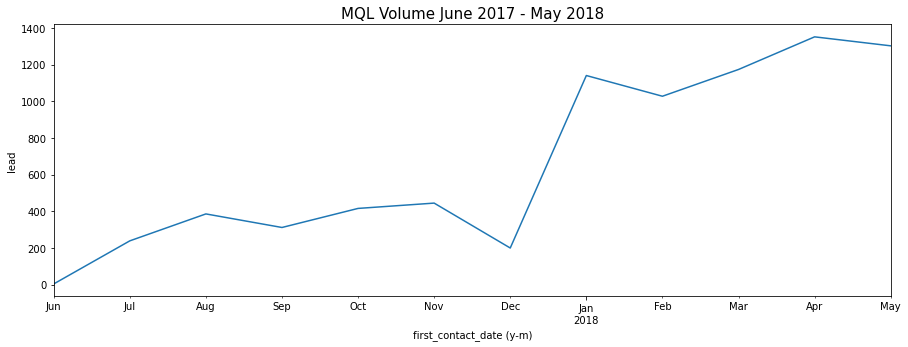

In [5]:
mql['first_contact_date (y-m)'] = mql['first_contact_date'].dt.to_period('M')
monthly_mql = mql.groupby('first_contact_date (y-m)').size()
plt.title('MQL Volume June 2017 - May 2018', fontsize=15)
plt.ylabel('lead')
ax = monthly_mql.plot(figsize=(15,5))

MQL volume per month increases rapidly during Jun 2017 to May 2018

In [6]:
mql['landing_page_id'].value_counts()

b76ef37428e6799c421989521c0e5077    912
22c29808c4f815213303f8933030604c    883
58326e62183c14b0c03085c33b9fdc44    495
88740e65d5d6b056e0cda098e1ea6313    445
ce1a65abd0973638f1c887a6efcfa82d    394
                                   ... 
a41b8b7318c4f42dbb65c277861ca89d      1
b34c567bf9cfa6ddc40b5b0d2d9c5bc7      1
b634a925e3768734c5b7b2325c88a082      1
44cb5e9f50dfa3b36e485b0f26c4fe5f      1
dabf7461e7b9fbcb03eb28449632f0c6      1
Name: landing_page_id, Length: 495, dtype: int64

I don't know why there are so many (495) landing pages for sellers to sign up.

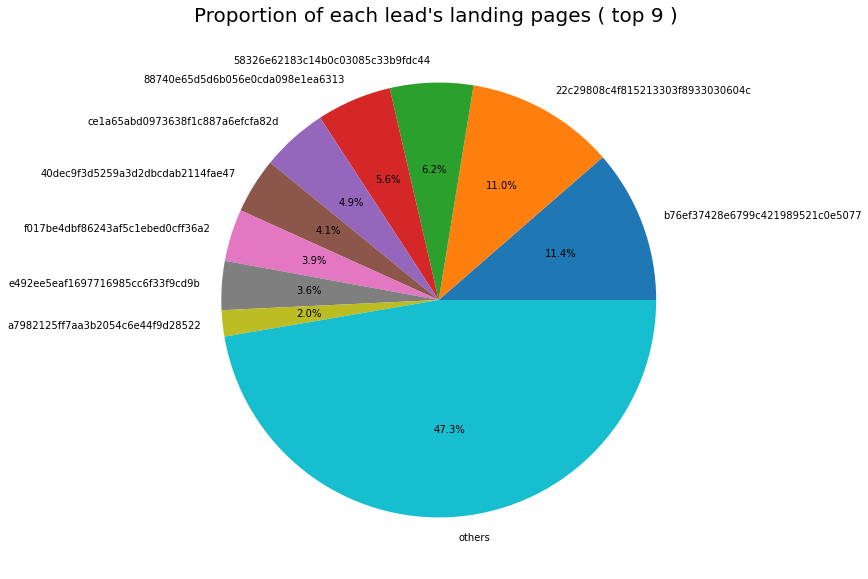

In [7]:
landing_pages = mql['landing_page_id'].value_counts()
top_landing_pages = landing_pages[:9]
top_landing_pages = top_landing_pages.append(pd.Series(landing_pages[9:].sum(), index=['others']))
plt.figure(figsize=(10,10))
plt.title('Proportion of each lead\'s landing pages ( top 9 ) ', fontdict={'fontsize':20})
pieplot = plt.pie(top_landing_pages, labels=top_landing_pages.index, autopct='%.1f%%') 

In [8]:
mql['origin'].value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1159
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

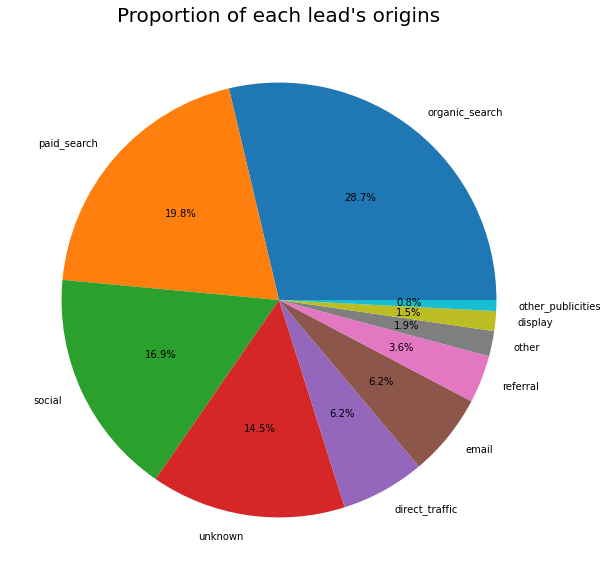

In [9]:
origins = mql['origin'].value_counts()
plt.figure(figsize=(10,10))
plt.title('Proportion of each lead\'s origins', fontdict={'fontsize':20})
pieplot = plt.pie(origins, labels=origins.index, autopct='%.1f%%') 

# **Closed Deals**

In [10]:
closed_deals

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,lead_behaviour_cat,lead_behaviour_eagle,lead_behaviour_shark,lead_behaviour_wolf,lead_behaviour_unknown
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,unknown,unknown,unknown,reseller,NaN,0.0,1,0,0,0,0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,unknown,unknown,unknown,reseller,NaN,0.0,0,1,0,0,0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,unknown,unknown,unknown,reseller,NaN,0.0,1,0,0,0,0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,unknown,unknown,unknown,reseller,NaN,0.0,0,0,0,0,1
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,unknown,unknown,unknown,manufacturer,NaN,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,unknown,unknown,unknown,reseller,NaN,0.0,1,0,0,0,0
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,unknown,unknown,unknown,reseller,132.0,200000.0,0,0,0,1,0
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,unknown,unknown,unknown,reseller,NaN,0.0,0,0,0,1,0
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,unknown,unknown,unknown,reseller,NaN,0.0,1,0,0,0,0


In [11]:
closed_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               842 non-null    object 
 6   lead_type                      842 non-null    object 
 7   has_company                    842 non-null    object 
 8   has_gtin                       842 non-null    object 
 9   average_stock                  842 non-null    object 
 10  business_type                  842 non-null    object 
 11  declared_product_catalog_size  69 non-null     float64
 12  declared_monthly_revenue       842 non-null    flo

Text(0.5, 1.0, 'Closed deal made by each employee as SDR or SR')

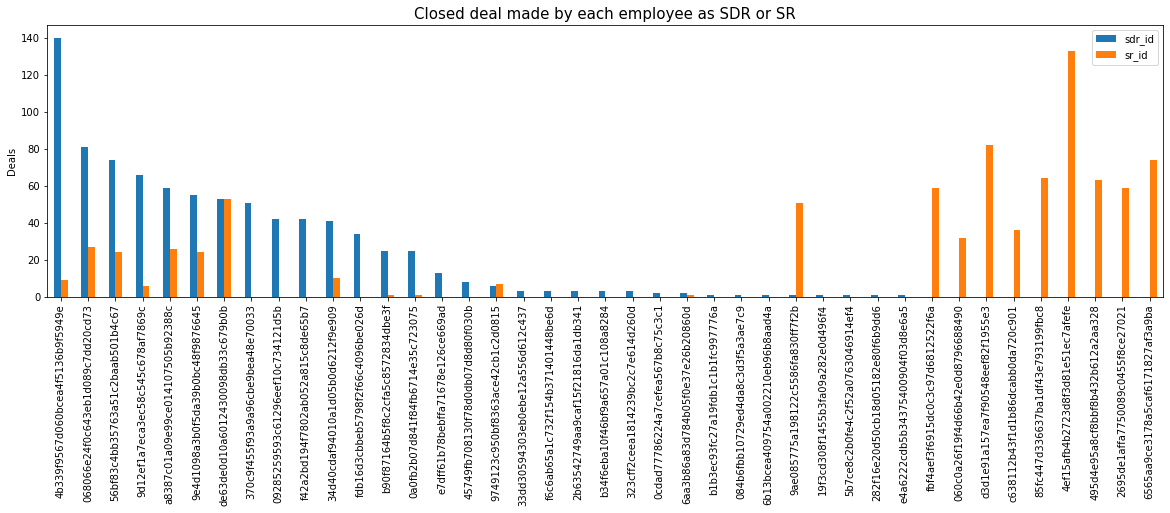

In [12]:
#closed_deals[closed_deals['sr_id'] == closed_deals['sdr_id']]['sr_id'].value_counts()
sdr = closed_deals['sdr_id'].value_counts()
sr = closed_deals['sr_id'].value_counts()

reps = sdr.to_frame().join(sr,how='outer')
reps = reps.fillna(0)
reps = reps.sort_values('sdr_id', ascending=False)

ax = reps.plot(kind='bar', figsize=(20,5))
ax.set(ylabel='Deals')
plt.title('Closed deal made by each employee as SDR or SR', fontdict={'fontsize':15})

Based on the figure above, we can see that some employees performed both the job of SDR and SR. The number of employees who did the job of SDR is greater that of the ones who did the job of SR. Also, eventhough some people did both job, most of them specialize in one of the two. However, the ones in the middle of the figure aren't good in neither the jobs.  Assuming these are all of the available sale employees for this service, they are probably going to be strong indicators that the deal was not closed for models that predicts which deal was closed.

In [13]:
closed_deals.groupby('sr_id')['sdr_id'].first().value_counts()

4b339f9567d060bcea4f5136b9f5949e    4
9d12ef1a7eca3ec58c545c678af7869c    4
09285259593c61296eef10c734121d5b    3
e7dff61b78bebffa71678e126ce669ad    1
b1b3ec93fc27a19fdb1c1b1fc997776a    1
068066e24f0c643eb1d089c7dd20cd73    1
fdb16d3cbbeb5798f2f66c4096be026d    1
a8387c01a09e99ce014107505b92388c    1
b90f87164b5f8c2cfa5c8572834dbe3f    1
45749fb708130f78d0db07d8d80f030b    1
56bf83c4bb35763a51c2baab501b4c67    1
084b6fbb10729ed4da8c3d3f5a3ae7c9    1
f42a2bd194f7802ab052a815c8de65b7    1
370c9f455f93a9a96cbe9bea48e70033    1
Name: sdr_id, dtype: int64

In [14]:
closed_deals.groupby('sdr_id')['sr_id'].first().value_counts()

d3d1e91a157ea7f90548eef82f1955e3    6
4ef15afb4b2723d8f3d81e51ec7afefe    5
6565aa9ce3178a5caf6171827af3a9ba    4
068066e24f0c643eb1d089c7dd20cd73    2
495d4e95a8cf8bbf8b432b612a2aa328    2
34d40cdaf94010a1d05b0d6212f9e909    2
de63de0d10a6012430098db33c679b0b    2
6aa3b86a83d784b05f0e37e26b20860d    1
a8387c01a09e99ce014107505b92388c    1
4b339f9567d060bcea4f5136b9f5949e    1
c638112b43f1d1b86dcabb0da720c901    1
0a0fb2b07d841f84fb6714e35c723075    1
9d12ef1a7eca3ec58c545c678af7869c    1
9e4d1098a3b0f5da39b0bc48f9876645    1
85fc447d336637ba1df43e793199fbc8    1
060c0a26f19f4d66b42e0d8796688490    1
Name: sr_id, dtype: int64

We can say the relationship between SR and SDR are many to many.

[Text(0, 0.5, 'Deals')]

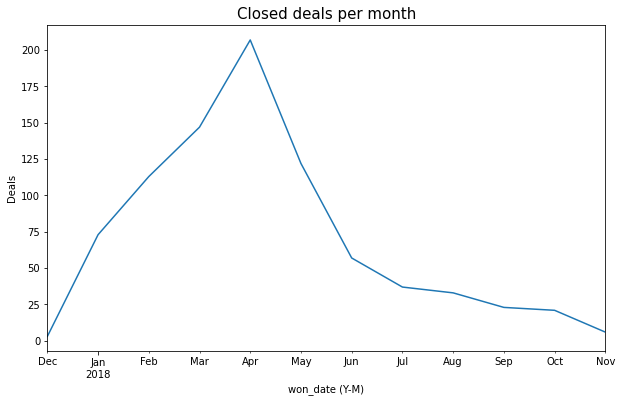

In [15]:
closed_deals['won_date'] = pd.to_datetime(closed_deals['won_date'])
closed_deals['won_date (Y-M)'] = closed_deals['won_date'].dt.to_period('M')
plt.figure(figsize=(10,6))
ax = closed_deals.groupby('won_date (Y-M)').size().plot()
plt.title('Closed deals per month', fontdict={'fontsize':15})
ax.set(ylabel='Deals')

The number of closed deals each month increased rapidly from Dec 2018 to April 2018. Then started to decline.

In [16]:
a = closed_deals['business_segment'].value_counts()
maximum_to_drop = 20
a['others']= a[a<maximum_to_drop].sum()
a = a.drop(axis=0, index=a[a<maximum_to_drop].index)

a

home_decor                         105
health_beauty                       93
car_accessories                     77
household_utilities                 71
construction_tools_house_garden     69
audio_video_electronics             64
computers                           34
pet                                 30
food_supplement                     28
food_drink                          26
sports_leisure                      25
bed_bath_table                      22
bags_backpacks                      22
toys                                20
others                             156
Name: business_segment, dtype: int64

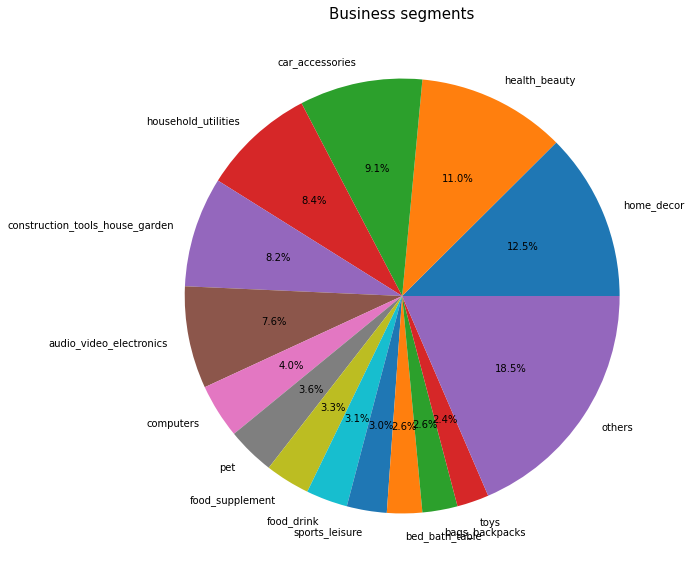

In [17]:
a = closed_deals['business_segment'].value_counts()
maximum_to_drop = 20
a['others']= a[a<maximum_to_drop].sum()
a = a.drop(axis=0, index=a[a<maximum_to_drop].index)

fig = plt.figure(figsize=(10,10))

ax = plt.axes()
ax.set_title('Business segments', fontdict={'fontsize':15})
ax = ax.pie(a, labels=a.index, autopct='%.1f%%')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


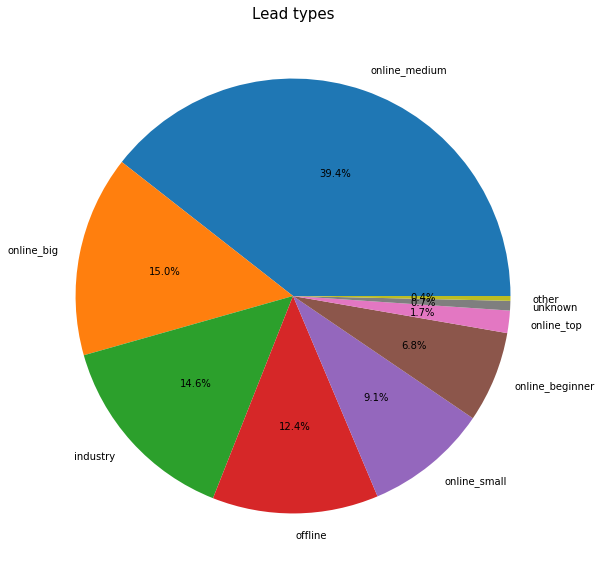

In [18]:
plt.figure(figsize=(10,10))
plt.title('Lead types', fontdict={'fontsize':15})
ax = plt.axes()
a = closed_deals['lead_type'].value_counts()
ax = ax.pie(a,labels=a.index, autopct='%.1f%%')

In [42]:
print('N/A percentage')
print('Has_gtin: {} %'.format((closed_deals['has_gtin'] == 'unknown').sum()/len(closed_deals)*100))
print('Has_company: {} %'.format((closed_deals['has_company'] == 'unknown').sum()/len(closed_deals)*100))
print('Average_stock: {} %'.format((closed_deals['average_stock'] == 'unknown').sum()/len(closed_deals)*100))
print('Declared_product_catalog_size: {} %'.format(closed_deals['declared_product_catalog_size'].isna().sum()/len(closed_deals)*100))

N/A percentage
Has_gtin: 92.39904988123516 %
Has_company: 92.51781472684085 %
Average_stock: 92.63657957244655 %
Declared_product_catalog_size: 91.80522565320665 %


These 4 columns have large percentage of missing values, which could make them have the least influence on any ML model.

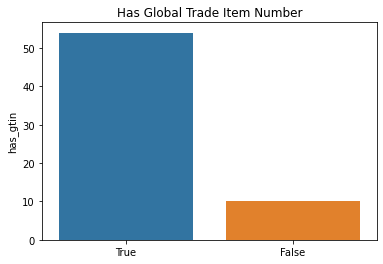

In [20]:
ax = plt.axes()
a = closed_deals['has_gtin'].value_counts().drop('unknown')
plt.title('Has Global Trade Item Number')
sns.barplot(y=a, x=a.index)

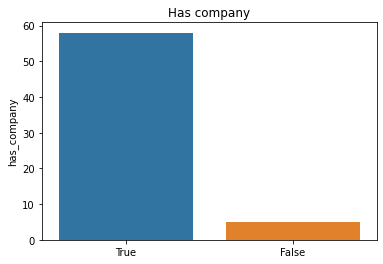

In [21]:
ax = plt.axes()
a = closed_deals['has_company'].value_counts().drop('unknown')
plt.title('Has company')
sns.barplot(y=a, x=a.index)

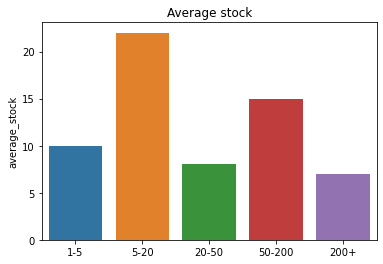

In [22]:
a = closed_deals['average_stock'].value_counts().drop('unknown')
a['5-20'], a['50-200'], a['1-5'], a['20-50'], a['200+'] = a['1-5'], a['5-20'], a['20-50'], a['50-200'], a['200+']

plt.title('Average stock')
sns.barplot(y=a, x=['1-5','5-20','20-50','50-200','200+'])

Average stock doesn't follow a normal distribution

Text(0.5, 1.0, 'Product catalog size')

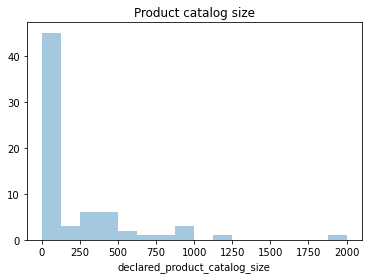

In [23]:
sns.distplot(closed_deals['declared_product_catalog_size'][closed_deals['declared_product_catalog_size'].notna()], kde=False)
plt.title('Product catalog size')

In [24]:
closed_deals['business_type'].value_counts()

reseller        587
manufacturer    242
unknown          10
other             3
Name: business_type, dtype: int64

In [25]:
closed_deals['declared_monthly_revenue'].value_counts().sort_index()

0.0           797
6.0             1
1000.0          1
4000.0          1
5000.0          2
6000.0          1
8000.0          1
10000.0         3
15000.0         2
20000.0         3
25000.0         3
30000.0         3
40000.0         1
50000.0         2
60000.0         2
100000.0        5
120000.0        2
130000.0        1
150000.0        1
180000.0        1
200000.0        1
210000.0        1
250000.0        2
300000.0        2
500000.0        1
8000000.0       1
50000000.0      1
Name: declared_monthly_revenue, dtype: int64

We don't know what monthly revenue of 0 means

[Text(0, 0.5, 'Percentage %')]

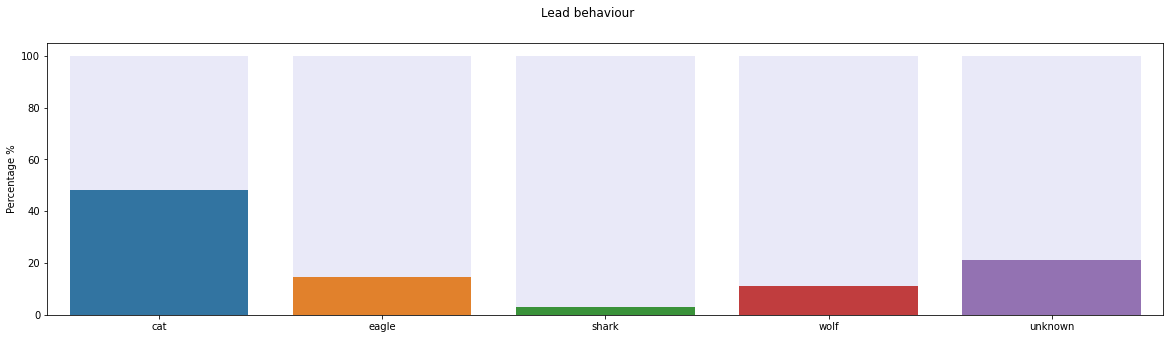

In [26]:
fig, axes = plt.subplots(1, figsize=(20,5), sharey=True)
fig.suptitle('Lead behaviour')

cat = closed_deals['lead_behaviour_cat'].value_counts()
eagle = closed_deals['lead_behaviour_eagle'].value_counts()
shark = closed_deals['lead_behaviour_shark'].value_counts()
wolf = closed_deals['lead_behaviour_wolf'].value_counts()
unknown = closed_deals['lead_behaviour_unknown'].value_counts()

total = [100, 100, 100, 100, 100]
behaviour = [cat[1]/len(closed_deals)*100, eagle[1]/len(closed_deals)*100, shark[1]/len(closed_deals)*100, wolf[1]/len(closed_deals)*100, unknown[1]/len(closed_deals)*100]
labels = ['cat', 'eagle', 'shark', 'wolf', 'unknown']

sns.barplot(y=total, x=labels, ax=axes, color='lavender')
sns.barplot(y=behaviour, x=labels, ax=axes)

axes.set(ylabel='Percentage %')

# **Combine**

In [27]:
closed_deals['mql_id'].isin(mql['mql_id']).sum()

842

The closed_deals dataset only contains leads acquired from the MQL dataset.

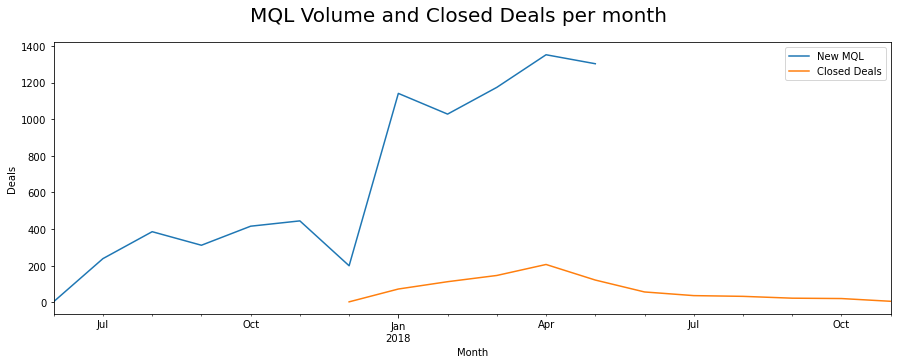

In [28]:
fig, axes = plt.subplots(1,1, sharey=True)
fig.suptitle('MQL Volume and Closed Deals per month', fontsize=20)

mql['first_contact_date'] = pd.to_datetime(mql['first_contact_date'])
mql['first_contact_date (y-m)'] = mql['first_contact_date'].dt.to_period('M')
axes = mql.groupby('first_contact_date (y-m)').size().plot(ax=axes, figsize=(15,5),label='New MQL')

closed_deals['won_date'] = pd.to_datetime(closed_deals['won_date'])
closed_deals['won_date (Y-M)'] = closed_deals['won_date'].dt.to_period('M')
axes = closed_deals.groupby('won_date (Y-M)').size().plot(ax=axes, label='Closed Deals')
axes.set(xlabel='Month', ylabel='Deals')

axes.legend()

It looks like leads generally took 6 months since the day that day first got contacted until they became customers.
Number of closed deals each month started to decline after the period of acquiring MQL ended.

In [29]:
print('Converting rate: {}'.format(842/8000))

Converting rate: 0.10525
